In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image
from PIL import Image

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
single_image= X_train[20000]

In [6]:
single_image.shape

(28, 28)

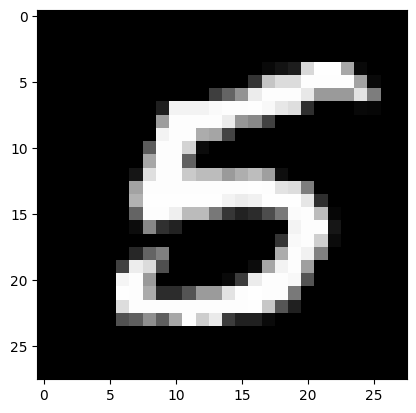

In [7]:
plt.imshow(single_image,cmap='gray')

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()

255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()

0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]

5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [17]:
type(y_train_onehot)

numpy.ndarray

In [18]:
y_train_onehot.shape

(60000, 10)

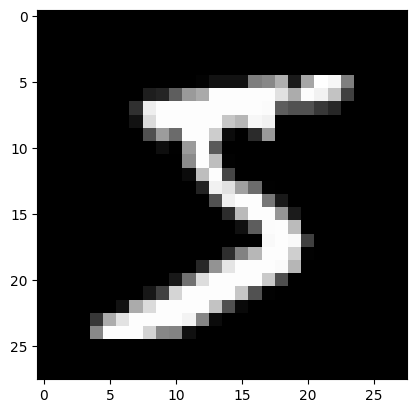

In [19]:
single_image = X_train[0]
plt.imshow(single_image,cmap='gray')

In [20]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [21]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [22]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 20)                92180     
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
Total params: 93222 (364.15 KB)
Trainable params: 93222 (364.15 KB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [24]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [25]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=70, validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
858/858 [==============================] - 32s 36ms/step - loss: 0.2768 - accuracy: 0.9191 - val_loss: 0.1034 - val_accuracy: 0.9701
Epoch 2/5
858/858 [==============================] - 29s 34ms/step - loss: 0.0863 - accuracy: 0.9746 - val_loss: 0.0679 - val_accuracy: 0.9800
Epoch 3/5
858/858 [==============================] - 33s 38ms/step - loss: 0.0611 - accuracy: 0.9812 - val_loss: 0.0512 - val_accuracy: 0.9828
Epoch 4/5
858/858 [==============================] - 50s 59ms/step - loss: 0.0490 - accuracy: 0.9851 - val_loss: 0.0496 - val_accuracy: 0.9835
Epoch 5/5
858/858 [==============================] - 30s 35ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0582 - val_accuracy: 0.9798


In [26]:
metrics = pd.DataFrame(model.history.history)

In [28]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.276789,0.919117,0.103410,0.9701
1,0.086302,0.974583,0.067914,0.9800
2,0.061051,0.981183,0.051234,0.9828
3,0.049018,0.985117,0.049583,0.9835
4,0.040237,0.987717,0.058183,0.9798


Name : J.JENISHA
Reg. No : 212222230056


<Axes: >

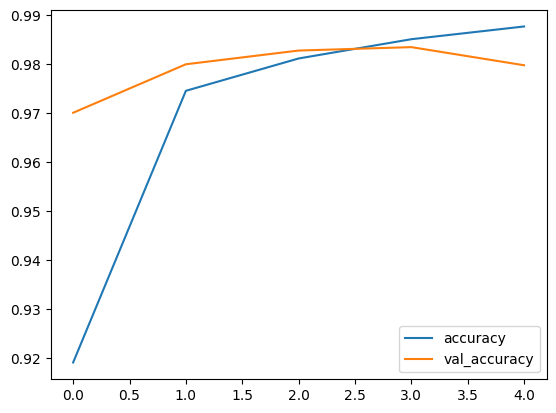

In [105]:
print("Name : J.JENISHA\nReg. No : 212222230056")
metrics[['accuracy','val_accuracy']].plot()

Name : J.JENISHA
Reg. No : 212222230056


Text(0.5, 1.0, 'Training Loss vs Validation Loss')

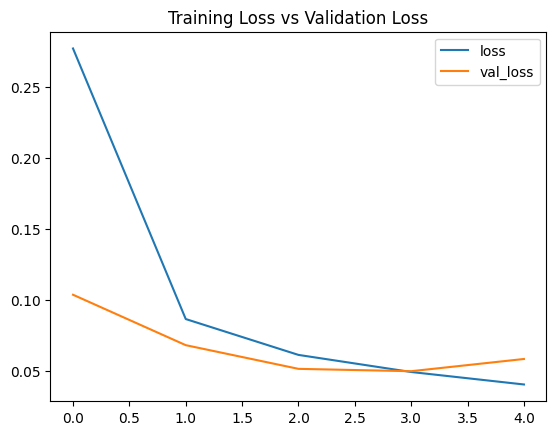

In [106]:
print("Name : J.JENISHA\nReg. No : 212222230056")
metrics[['loss','val_loss']].plot()
plt.title("Training Loss vs Validation Loss")

In [31]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 2s 5ms/step


In [102]:
print("Name : J.JENISHA\nReg. No : 212222230056\n\nCONFUSION MATRIX\n")
print(confusion_matrix(y_test,x_test_predictions))

Name : J.JENISHA
Reg. No : 212222230056

CONFUSION MATRIX

[[ 973    0    0    0    1    2    2    1    1    0]
 [   0 1119    1    2    6    1    2    3    1    0]
 [   7    3  978   11    4    0    4   18    4    3]
 [   0    0    0  994    0    8    0    1    1    6]
 [   0    0    0    0  964    0    2    0    0   16]
 [   0    0    0    3    0  884    1    1    0    3]
 [   5    2    0    0    2    5  942    0    2    0]
 [   1    0    4    2    0    0    0 1011    1    9]
 [   5    0    1    2    3    4    0    4  932   23]
 [   1    1    0    0    1    5    0    0    0 1001]]


In [103]:
print("Name : J.JENISHA\nReg. No : 212222230056\n\nCLASSIFICATION REPORT\n")
print(classification_report(y_test,x_test_predictions))

Name : J.JENISHA
Reg. No : 212222230056

CLASSIFICATION REPORT

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      0.95      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.97      0.98      0.98      1028
           8       0.99      0.96      0.97       974
           9       0.94      0.99      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



# **Prediction for  Single Input**

In [89]:
img = image.load_img('7_f.jpg')

In [90]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [91]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [92]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 37ms/step


In [93]:
print(x_single_prediction)

[7]


Name : J.JENISHA
Reg. No : 212222230056


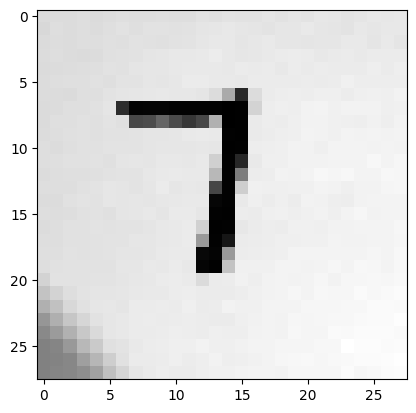

In [107]:
print("Name : J.JENISHA\nReg. No : 212222230056")
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [95]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [96]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 32ms/step


In [97]:
print(x_single_prediction)

[7]
